In [496]:
# First we are importing all the necessary libraries required for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # This is used to ignore any unwanted warnings from popping up

In [497]:
#Reading the leads.csv file uploaded in the repository
lead_df1=pd.read_csv('leads.csv')
lead_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [498]:
#Understanding the Data

#1. Shape of the Data:
lead_df1.shape
#Here we can see that the data set is having 37 columns and 9240 rows(9240x37)

(9240, 37)

In [499]:
#2. Data Types of the variables within the data set:
lead_df1.info()

#There are a total of 7 numerical variables columns and 30 columns which are having categorical variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [500]:
#3. Learning about the Statistical information about the data:
lead_df1.describe()
#As we can see in the Output that totalVisits ,Total Time Spent on Website and Page Views Per Visit are having outliers whereas the remaining columns are not having much Outliers

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [501]:
# Replacing all 'select' values with NaN
lead_df1=lead_df1.replace('select', np.nan)


In [502]:
#Data Cleaning:
# As we can see that there are some redundant columns like Prospect ID,Lead Number,Country,I agree to pay the amount through cheque and a free copy of Mastering The Interview in the Data set. So we can Drop those columns:
drop_cols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque','A free copy of Mastering The Interview','City']
lead_df1=lead_df1.drop(drop_cols,1)

In [503]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,No,No,Select,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,No,No,Select,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,No,No,Potential Lead,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,No,No,Select,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,No,No,Select,Modified


In [504]:
# 1. Checking the for missing values in the Data Set
round(lead_df1.isnull().sum()/len(lead_df1)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [505]:
# We can remove the columns that are having more than 30% of null values:
dropcolumns=lead_df1.isnull().sum()
dropcolumns=dropcolumns[dropcolumns.values/len(lead_df1)>0.30]

In [506]:
#Dropping the 6 columns
drop_columns=list(dropcolumns.keys())
lead_df1=lead_df1.drop(drop_columns,1)  

In [507]:
#Dropping the Columns:
drop_cols=['Specialization','How did you hear about X Education','Lead Profile']
lead_df1=lead_df1.drop(drop_cols,1)

In [508]:
#Again checking on the Null Value Percentage of the remaning Attributes in the Data Set
round(lead_df1.isnull().sum()/len(lead_df1)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [509]:
# Now for the columns having below 30% missing values we can impute the maximum number of occurences for a particluar column where missing values are found.
lead_df['Lead Source'].value_counts().head(5) 

#Google is having the highest value so we will replace the missing values with the Google value.

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

In [510]:
lead_df['TotalVisits'].value_counts().head(5) 
#0.0 is having the highest value so we will replace the missing values with the 0.0 value.

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [511]:
lead_df['Page Views Per Visit'].value_counts().head(5) 
#0.0 is having the highest value so we will replace the missing values with the 0.0 value.

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [512]:
lead_df['Last Activity'].value_counts().head(5) 
#Email Opened is having the highest value so we will replace the missing values with the Email Opened value.

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [513]:
lead_df['What is your current occupation'].value_counts().head(5) 
#Unemployed is having the highest value so we will replace the missing values with the Unemployed value.

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

In [514]:
lead_df['What matters most to you in choosing a course'].value_counts().head(5) 
#Better Career Prospects is having the highest value so we will replace the missing values with the Better Career Prospects value.

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [515]:
# Now we are imputing these values in our missing values dataset for their respective categories

missing_values={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}

lead_df1=lead_df1.fillna(value=missing_values)

In [516]:
# Now we are checking for the missing values after imputing values to the missing area
lead_df1.isnull().sum() 

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

In [517]:
# Data Transformation:
# here we are assigning numerical variables to categories with 'Yes' to 1 and 'No' to 0 

category_value={"No":0,"Yes":1}    
lead_df1['Do Not Email']=lead_df1['Do Not Email'].map(category_value)
lead_df1['Do Not Call']=lead_df1['Do Not Call'].map(category_value)
lead_df1['Search']=lead_df1['Search'].map(category_value)
lead_df1['Magazine']=lead_df1['Magazine'].map(category_value)
lead_df1['Newspaper Article']=lead_df1['Newspaper Article'].map(category_value)
lead_df1['X Education Forums']=lead_df1['X Education Forums'].map(category_value)
lead_df1['Newspaper']=lead_df1['Newspaper'].map(category_value)
lead_df1['Digital Advertisement']=lead_df1['Digital Advertisement'].map(category_value)
lead_df1['Through Recommendations']=lead_df1['Through Recommendations'].map(category_value)
lead_df1['Receive More Updates About Our Courses']=lead_df1['Receive More Updates About Our Courses'].map(category_value)
lead_df1['Update me on Supply Chain Content']=lead_df1['Update me on Supply Chain Content'].map(category_value)
lead_df1['Get updates on DM Content']=lead_df1['Get updates on DM Content'].map(category_value)

In [518]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [519]:
# Now we are creating a dummy variables for 8 categories and dropping the first level.

dummy=pd.get_dummies(lead_df1[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

# Adding these dummies to our original dataset

lead_df1=pd.concat([lead_df1,dummy],axis=1)

lead_df1.shape

(9240, 84)

In [520]:
# We have created the dummies for below categories hence removing the original column in the Data set

duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


lead_df1=lead_df1.drop(duplicates,1)

lead_df1.shape

(9240, 78)

In [521]:
# Next we are dropping the redundant variables

redundant_values=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

lead_df1=lead_df1.drop(redundant_values,1)

In [522]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Do Not Email                                                             9240 non-null   int64 
 1   Do Not Call                                                              9240 non-null   int64 
 2   Converted                                                                9240 non-null   int64 
 3   TotalVisits                                                              9240 non-null   object
 4   Total Time Spent on Website                                              9240 non-null   int64 
 5   Page Views Per Visit                                                     9240 non-null   object
 6   Search                                                                   9240 no

In [523]:
# Converting some categories to numercial as they are imported as an 'Object'
lead_df1= lead_df1.astype({'TotalVisits':'float','Page Views Per Visit':'float'})
lead_df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

In [524]:
# Checking for any Outliers:
round(lead_df1.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)
#As we can see from the tables that there are two outliers:TotalVisits and Page Views Per Visit 

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


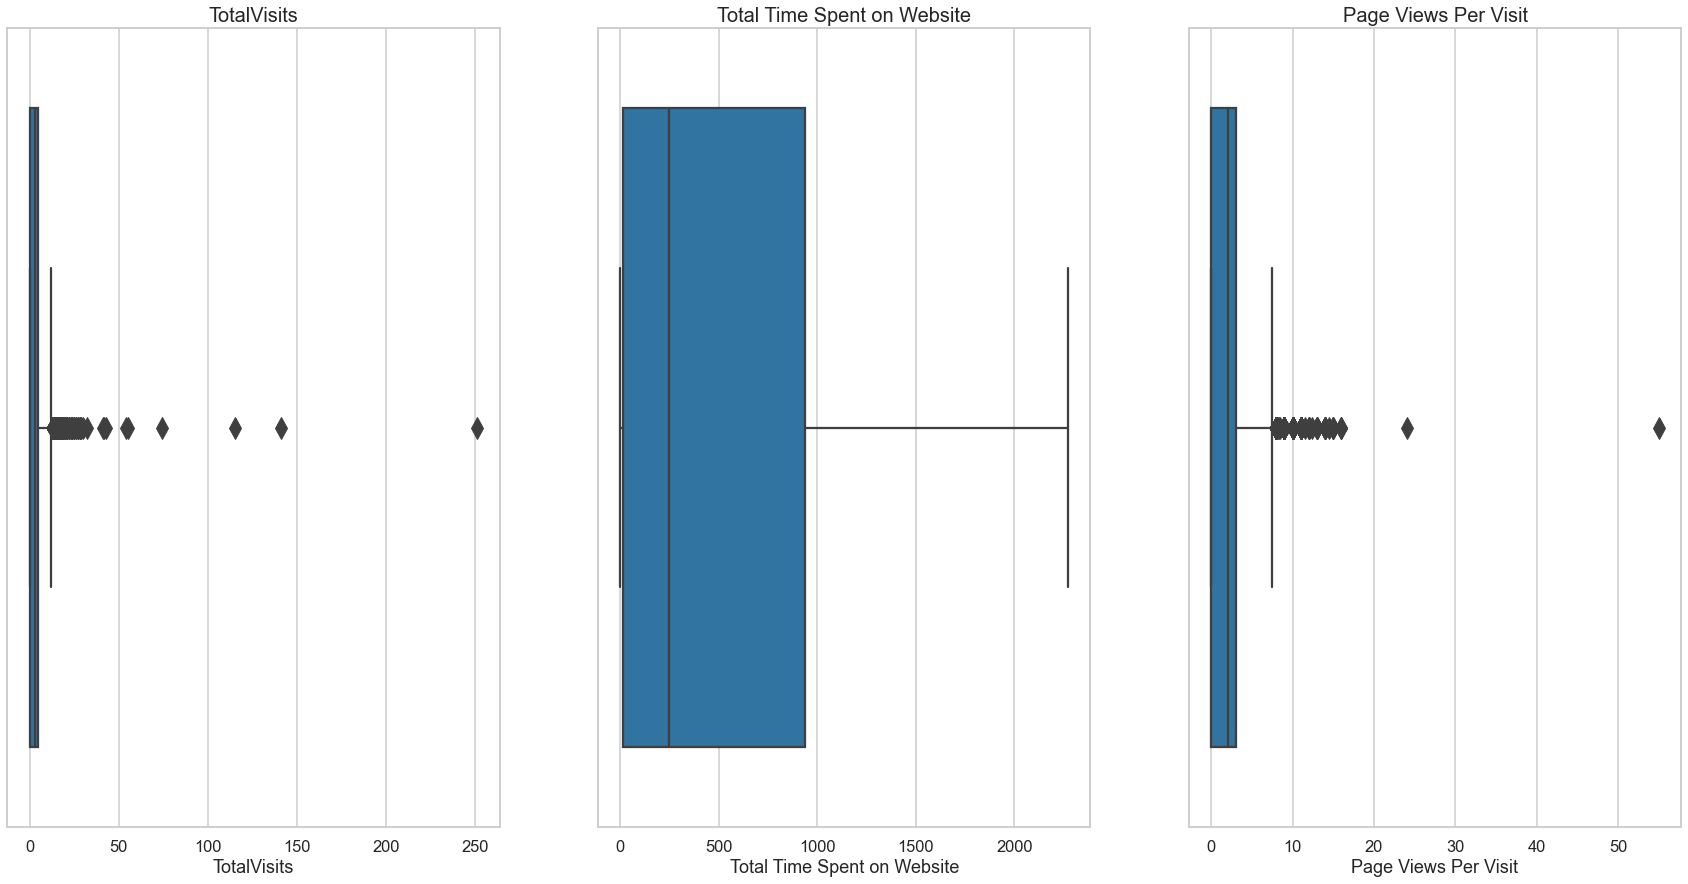

In [525]:
# First we are setting the size of figure, context and gridlines

plt.figure(figsize=(30,50))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')
#Next we are setting up the outliers into a dataset
col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Then we are visualising the outliers with the help of boxplot for all the variables in the Data set col.

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=lead_df1[col[i]],data=lead_df1,orient='v',fliersize=15)  # using boxplot
        
#By the graph we can hence conclude that TotalVisits and Page Views Per Visit are having outliers and Total Time Spent on Website are not having any outliers

In [526]:
# Now we have to create bins for each set:

# First we are creating for 'TotalVisits' variable

# here we have the range from 0 to 251 for'TotalVisits' variable so lets define the bins as:

total_visits_bins={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Next we are assigning '1' or '0' to each bins

for i in range(len(list(total_visits_bins.keys()))):
    lead_df1[list(total_visits_bins.keys())[i]]=lead_df1['TotalVisits'].map(lambda x: 1 if (x < list(total_visits_bins.values())[i] and x >= (list(total_visits_bins.values())[i] - 50)) else 0)


In [527]:
# Next we are creating bins for 'Page Views Per Visit' variable

# here we have range from 0 to 55 for'Page Views Per Visit' variable so lets define the bins as:

page_visits_bins={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

#Next we are assigning '1' or '0' to each bins

for i in range(len(list(page_visits_bins.keys()))):
    lead_df1[list(page_visits_bins.keys())[i]]=lead_df1['Page Views Per Visit'].map(lambda x: 1 if (x < list(page_visits_bins.values())[i] and x >= (list(page_visits_bins.values())[i] - 10)) else 0)
                                                                                               
                                                                                                     

In [528]:
#Next we are removing redundant columns/varaibles.
redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

lead_df1=lead_df1.drop(redundant,axis=1)

lead_df1.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [529]:
#Data Preparation:

#Train-Test Split
from sklearn.model_selection import train_test_split

In [530]:
# Here we are separating target varaible from the dependent variable
# First we are putting the target varaible 'Converted' to a new series 'y'

y=lead_df1['Converted']   

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [531]:
# Then we are putting the dependent variable in a new dataset called 'X'

X=lead_df1.drop('Converted',1)

X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [532]:
# Next we are splitting the datset into train and test dataset:

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [533]:
#Now we are creating sn object:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [534]:
# Next we are Scalling the 'Total Time Spent on Website' variables with standard scaler and fitting - tranforming the X - train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [535]:
# Next we are checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

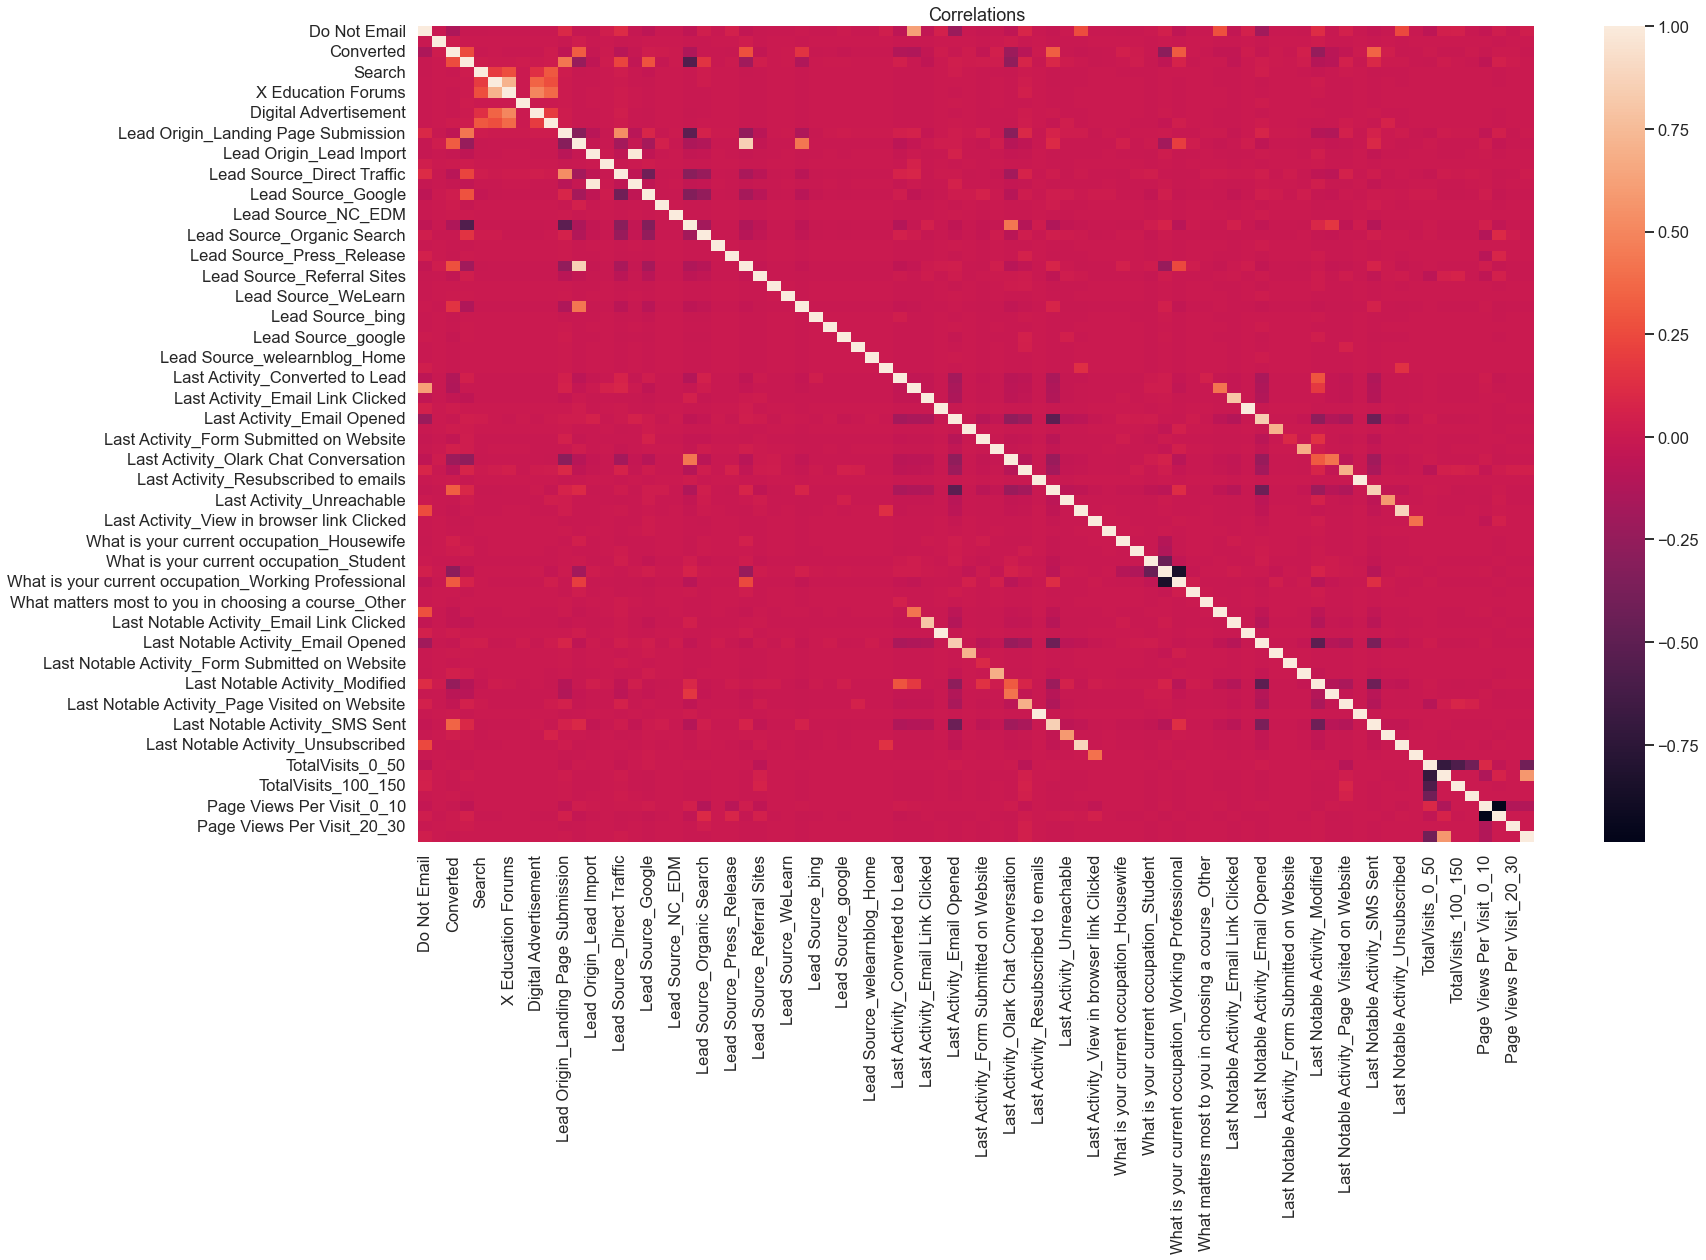

In [536]:
#Correlation of the data Set:

# First we are setting the figure size

plt.figure(figsize=(25,15))

# Next we are setting the title

plt.title('Correlations')

# Then we are plotting a heatmap

sns.heatmap(lead_df1.corr(method='spearman'))

plt.show()

In [537]:
#From the above heatmap, we can see that What is your current occupation_Unemployed having high correlation, hence we can drop them
heat_correlations=['What is your current occupation_Unemployed']

X_train=X_train.drop(heat_correlations,1)      # dropping from X train set

X_test=X_test.drop(heat_correlations,1)       # dropping from X test set

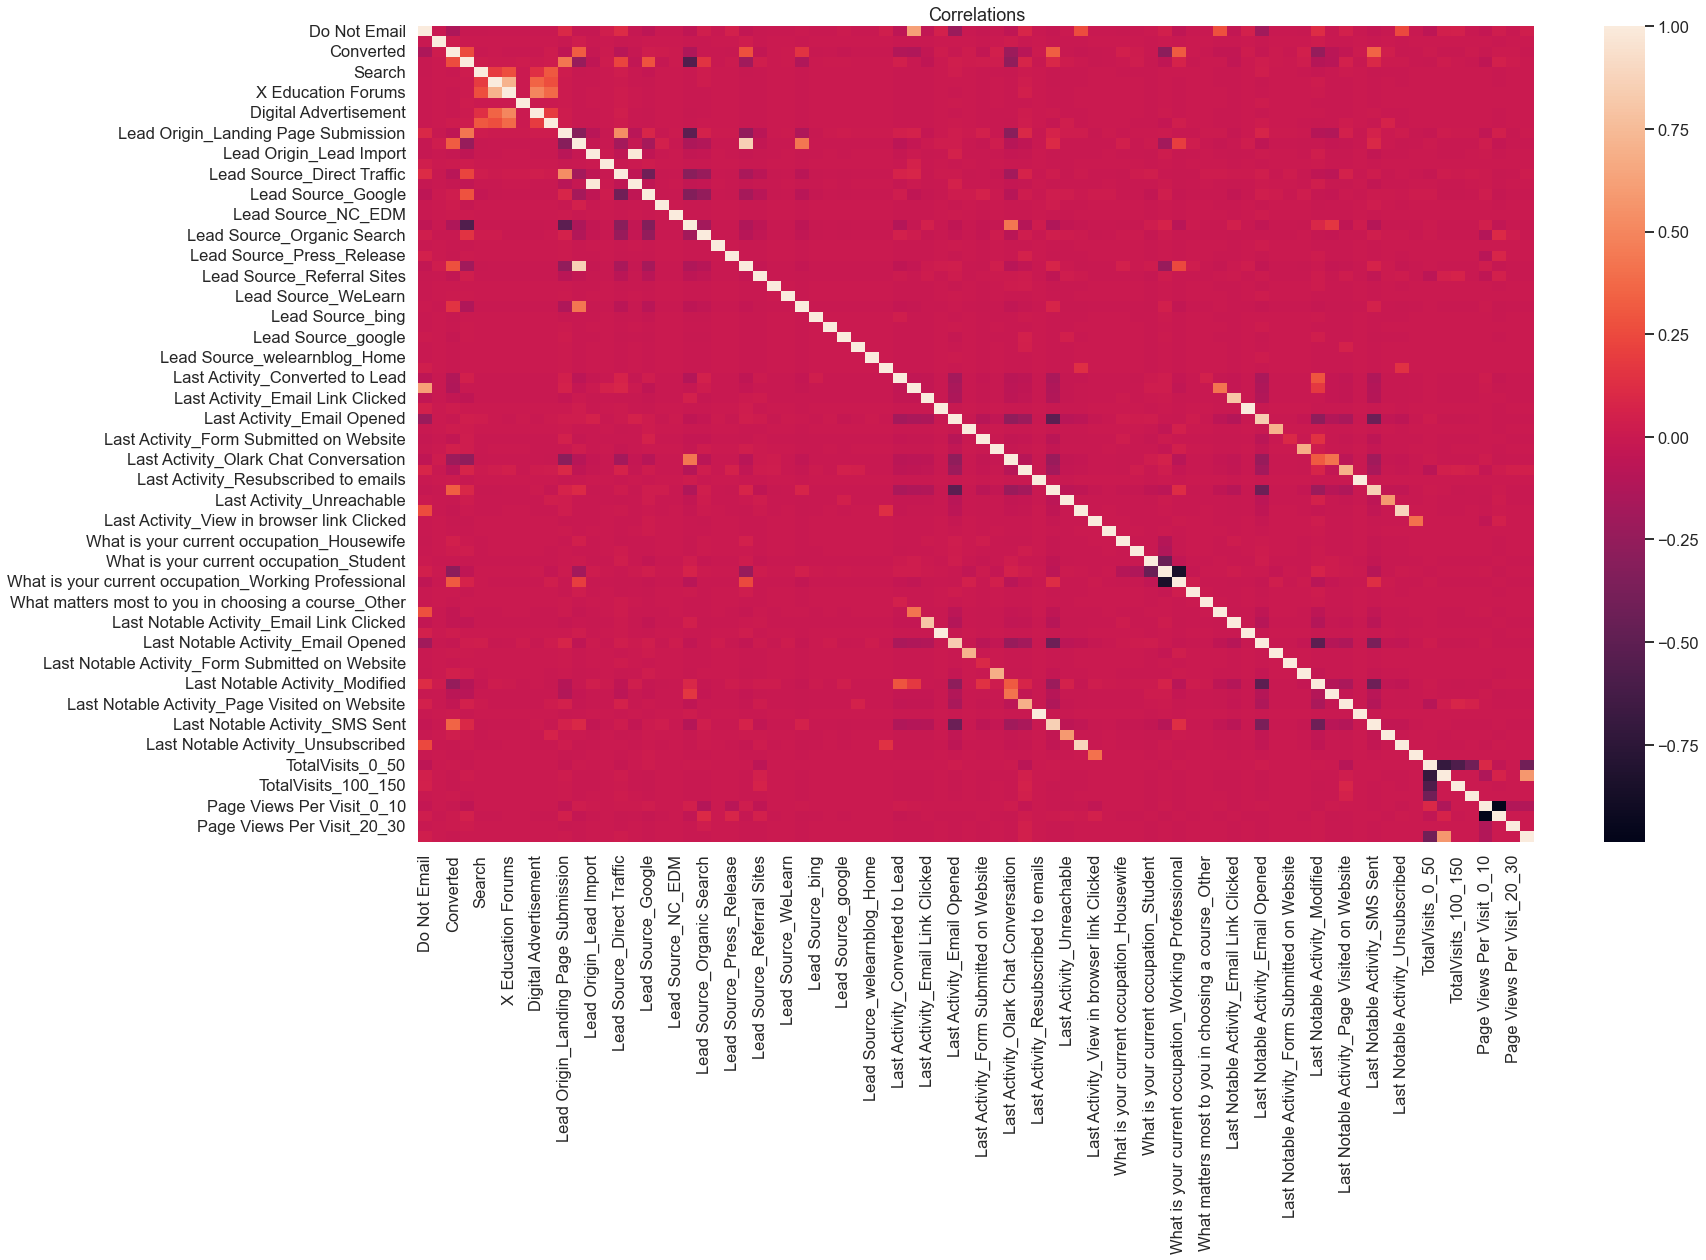

In [538]:
# Again checking the correlation of the data Set:

# First we are setting the figure size

plt.figure(figsize=(25,15))

# Next we are setting the title

plt.title('Correlations')

# Then we are plotting a heatmap

sns.heatmap(lead_df1.corr(method='spearman'))

plt.show()

In [539]:
#Building the Model

import statsmodels.api as sm
logis_model=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6396
Model Family:                Gaussian   Df Model:                           71
Link Function:               identity   Scale:                         0.13682
Method:                          IRLS   Log-Likelihood:                -2708.1
Date:                Sun, 16 Oct 2022   Deviance:                       874.92
Time:                        21:13:16   Pearson chi2:                     875.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.7064      0.205      3.448      0.001       0.305       1.108
Do Not Email                                                               -0.1234      0.025     -5.035      0.000      -0.171      -0.075
Do Not Call                                                                 0.4896      0.262      1.868      0.062      -0.024       1.003
Total Time Spent on Website                                                 0.1835      0.005     35.227      0.000       0.173       0.194
Search                                                                      0.0880      0.121      0.725      0.469      -0.150       0.326
Newspaper Article                                                           0.6322      0.371      1.706      0.088      -0.094       1.359
X Education Forums                                                         -0.7066      0.611     -1.157      0.247      -1.904       0.490
Newspaper                                                                  -0.6867      0.370     -1.855      0.064      -1.412       0.039
Digital Advertisement                                                      -0.3819      0.262     -1.458      0.145      -0.895       0.131
Through Recommendations                                                     0.1414      0.157      0.899      0.369      -0.167       0.450
Lead Origin_Landing Page Submission                                        -0.0245      0.014     -1.806      0.071      -0.051       0.002
Lead Origin_Lead Add Form                                                   0.4840      0.071      6.791      0.000       0.344       0.624
Lead Origin_Lead Import                                                     0.1789      0.264      0.677      0.499      -0.339       0.697
Lead Origin_Quick Add Form                                                  0.3402      0.371      0.916      0.360      -0.388       1.068
Lead Source_Direct Traffic                                                 -0.0156      0.225     -0.069      0.945      -0.458       0.426
Lead Source_Facebook                                                       -0.1909      0.347     -0.550      0.582      -0.871       0.490
Lead Source_Google                                                          0.0387      0.225      0.172      0.864      -0.402       0.480
Lead Source_Live Chat                                                       0.1653      0.338      0.489      0.625      -0.497       0.828
Lead Source_NC_EDM                                                          0.5935      0.433      1.370      0.171      -0.255       1.442
Lea

In [540]:
#After analyzing the above summary presented by generalizing linear model, hence we can tell that there are so many variable which has an insignificant p-values set. 
# Now using RFE we are for feature selection:

# Now we are creating object

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg=LogisticRegression() 

In [541]:
# next we are running RFE with two different variable count in order to find the best results
rfe = RFE(logreg,19)

rfe = rfe.fit(X_train,y_train) 

In [542]:
# Next we are checking for ture and false that are assigned to the variables after rfe
rfe.support_ 

array([ True, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False])

In [543]:
# Next we are selecting columns only which are 'True' in rfe.support_

col=X_train.columns[rfe.support_]

X_train_1=sm.add_constant(X_train[col])

In [544]:
# creating the 1st model after RFE

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.1
Date:                Sun, 16 Oct 2022   Deviance:                       5362.1
Time:                        21:13:24   Pearson chi2:                 7.28e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0837      0.068      1.230      0.219      -0.050       0.217
Do Not Email                                            -1.2627      0.194     -6.520      0.000      -1.642      -0.883
Total Time Spent on Website                              1.1007      0.040     27.852      0.000       1.023       1.178
Newspaper                                              -24.0078   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                3.2071      0.489      6.555      0.000       2.248       4.166
Lead Source_Olark Chat                                   1.1394      0.102     11.133      0.000       0.939       1.340
Lead Source_Reference                                    0.5900      0.523      1.129      0.259      -0.434       1.615
Lead Source_Welingak Website                             2.4922      0.869      2.869      0.004       0.789       4.195
Last Activity_Converted to Lead                         -1.0454      0.227     -4.614      0.000      -1.489      -0.601
Last Activity_Email Bounced                             -1.1291      0.345     -3.276      0.001      -1.805      -0.454
Last Activity_Olark Chat Conversation                   -1.2235      0.193     -6.323      0.000      -1.603      -0.844
What is your current occupation_Housewife               22.9156   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Working Professional     2.7902      0.188     14.839      0.000       2.422       3.159
Last Notable Activity_Email Link Clicked                -1.9012      0.273     -6.970      0.000      -2.436      -1.367
Last Notable Activity_Email Opened                      -1.3168      0.087    -15.182      0.000      -1.487      -1.147
Last Notable Activity_Had a Phone Conversation           2.1355      1.099      1.942      0.052      -0.019       4.290
Last Notable Activity_Modified                          -1.6790      0.099    -16.937      0.000      -1.873      -1.485
Last Notable Activity_Olark Chat Conversation           -1.4302      0.374     -3.824      0.000      -2.163      -0.697
Last Notable Activity_Page Visited on Website           -1.6163      0.193     -8.394      0.000      -1.994      -1.239
TotalVisits_250_300                                     24.9745   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
========================================================================================================================
"""

In [545]:
# Calculating VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [548]:
# First we are creating vif dataframe

vif=pd.DataFrame()

# then we are adding same features as the x_train dataset have

vif['Features']=X_train_1[col].columns  

# Next we are Calculating the VIFs

vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]

# Then we are Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Next we Sort the vif values

vif=vif.sort_values(by='VIF',ascending=False)
vif 
# We can see that all features are having vif values less than 5, So we can concluse that there is no multicollinearity issue in the given dataset.

,Features,VIF
3,Lead Origin_Lead Add Form,15.70
5,Lead Source_Reference,12.96
6,Lead Source_Welingak Website,3.77
9,Last Activity_Olark Chat Conversation,1.99
15,Last Notable Activity_Modified,1.92
0,Do Not Email,1.81
8,Last Activity_Email Bounced,1.79
4,Lead Source_Olark Chat,1.67
16,Last Notable Activity_Olark Chat Conversation,1.32
7,Last Activity_Converted to Lead,1.24


In [549]:
# Dropping columns with higher P-values:
X_train_2=X_train_1.drop(['Newspaper','What is your current occupation_Housewife','Lead Source_Reference','TotalVisits_250_300'],1)

In [550]:
# creating the 2nd model after RFE

X_train_2=sm.add_constant(X_train_2)                              
logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())  
reg2=logis2.fit()                                                 
reg2.summary()                  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.13858
Method:                          IRLS   Log-Likelihood:                -2778.2
Date:                Sun, 16 Oct 2022   Deviance:                       894.10
Time:                        21:17:55   Pearson chi2:                     894.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5021      0.010     48.621      0.000       0.482       0.522
Do Not Email                                            -0.1586      0.023     -6.988      0.000      -0.203      -0.114
Total Time Spent on Website                              0.1861      0.005     35.865      0.000       0.176       0.196
Lead Origin_Lead Add Form                                0.5493      0.020     27.503      0.000       0.510       0.588
Lead Source_Olark Chat                                   0.1628      0.014     11.493      0.000       0.135       0.191
Lead Source_Welingak Website                             0.1941      0.043      4.472      0.000       0.109       0.279
Last Activity_Converted to Lead                         -0.1150      0.024     -4.776      0.000      -0.162      -0.068
Last Activity_Email Bounced                             -0.0704      0.033     -2.160      0.031      -0.134      -0.007
Last Activity_Olark Chat Conversation                   -0.1451      0.020     -7.104      0.000      -0.185      -0.105
What is your current occupation_Working Professional     0.3443      0.018     19.054      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.3069      0.036     -8.626      0.000      -0.377      -0.237
Last Notable Activity_Email Opened                      -0.2233      0.013    -17.501      0.000      -0.248      -0.198
Last Notable Activity_Had a Phone Conversation           0.2388      0.113      2.120      0.034       0.018       0.460
Last Notable Activity_Modified                          -0.2769      0.014    -20.408      0.000      -0.303      -0.250
Last Notable Activity_Olark Chat Conversation           -0.2601      0.040     -6.515      0.000      -0.338      -0.182
Last Notable Activity_Page Visited on Website           -0.2695      0.026    -10.263      0.000      -0.321      -0.218
========================================================================================================================
"""

In [551]:
# Dropping columns with higher P-values:
X_train_3=X_train_2.drop(['Last Activity_Email Bounced','Last Notable Activity_Had a Phone Conversation'],1)

In [552]:
# creating the 3rd model after RFE

X_train_3=sm.add_constant(X_train_3)                              
logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())  
reg3=logis3.fit()                                                 
reg3.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13873
Method:                          IRLS   Log-Likelihood:                -2782.8
Date:                Sun, 16 Oct 2022   Deviance:                       895.36
Time:                        21:17:59   Pearson chi2:                     895.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5050      0.010     49.115      0.000       0.485       0.525
Do Not Email                                            -0.1892      0.018    -10.521      0.000      -0.224      -0.154
Total Time Spent on Website                              0.1860      0.005     35.820      0.000       0.176       0.196
Lead Origin_Lead Add Form                                0.5488      0.020     27.466      0.000       0.510       0.588
Lead Source_Olark Chat                                   0.1617      0.014     11.419      0.000       0.134       0.190
Lead Source_Welingak Website                             0.1957      0.043      4.507      0.000       0.111       0.281
Last Activity_Converted to Lead                         -0.1117      0.024     -4.646      0.000      -0.159      -0.065
Last Activity_Olark Chat Conversation                   -0.1401      0.020     -6.901      0.000      -0.180      -0.100
What is your current occupation_Working Professional     0.3449      0.018     19.076      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.3093      0.036     -8.694      0.000      -0.379      -0.240
Last Notable Activity_Email Opened                      -0.2260      0.013    -17.754      0.000      -0.251      -0.201
Last Notable Activity_Modified                          -0.2831      0.013    -21.166      0.000      -0.309      -0.257
Last Notable Activity_Olark Chat Conversation           -0.2660      0.040     -6.667      0.000      -0.344      -0.188
Last Notable Activity_Page Visited on Website           -0.2679      0.026    -10.218      0.000      -0.319      -0.216
========================================================================================================================
"""

In [553]:
#From the above summary we can hence conclude that all the variables are present in this model are significant as there is no variables which is having p - value greater than 5% 

In [554]:
#Creating VIF:
X_train_3_1=X_train_3.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_3_1.columns       # Adding final train dataset features

# Now calculating the Vif Data

vif['VIF']=[variance_inflation_factor(X_train_3_1.values,i) for i in range(X_train_3_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset given

vif=vif.sort_values(by='VIF',ascending=False)

vif  

# There is no sign of multicollinearity shown from below vif dataframe

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.96
10,Last Notable Activity_Modified,1.87
3,Lead Source_Olark Chat,1.67
2,Lead Origin_Lead Add Form,1.42
11,Last Notable Activity_Olark Chat Conversation,1.32
4,Lead Source_Welingak Website,1.23
5,Last Activity_Converted to Lead,1.23
1,Total Time Spent on Website,1.20
7,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.13


In [556]:
#Predicting a Train Model:

#First we are predicting the train dataset with our final model

y_train_prepared=reg3.predict(X_train_3)

# Creating a new dataset and saving predicted values in it

y_train_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_prepared,'ID':y_train.index})

y_train_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.276141,1871
6795,0,0.280094,6795
3516,0,0.312207,3516
8105,0,0.758909,8105
3934,0,0.219038,3934


In [560]:
#ROC Curve Plotting:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def lead_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fr, tr, threshold = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fr, tr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

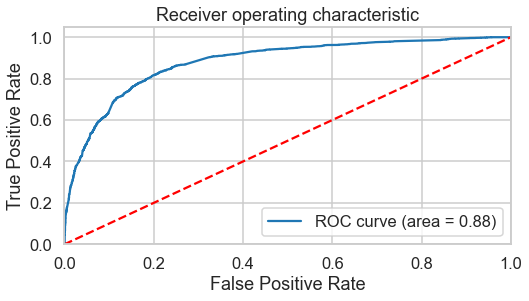

In [561]:
# Calling the roc curve for plotting

lead_roc(y_train_final.Converted, y_train_final.Converted_probability)

In [562]:
#Here we can conclude the folowwing points:
#The curve is closer to the left side of the border line than to the right side,hence we can conclude that our model is having great accuracy.
#The area under the curve is 88% of the total area.

In [563]:
#Finding optimal probability cutoff point:

# Next we are creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_final[i]=y_train_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.276141,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.280094,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.312207,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.758909,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.219038,3934,1,1,1,0,0,0,0,0,0,0


In [564]:
#Next we are finding out the possibilities of choosing any one of the points from 0 to 0.9.This can by found by findig the 'Accuracy', 'Sensitivity' and 'Specificity' for each points.
from sklearn.metrics import confusion_matrix

# First we are creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_final['Converted'],y_train_final[i])  
    total=sum(sum(cm_matrix))                                                          
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.436456    0.995945     0.091704
0.1          0.1  0.560297    0.976075     0.304098
0.2          0.2  0.698052    0.939173     0.549475
0.3          0.3  0.791435    0.863747     0.746877
0.4          0.4  0.809369    0.793998     0.818841
0.5          0.5  0.812616    0.684509     0.891554
0.6          0.6  0.786333    0.536091     0.940530
0.7          0.7  0.748918    0.389294     0.970515
0.8          0.8  0.721088    0.294809     0.983758
0.9          0.9  0.680427    0.170316     0.994753


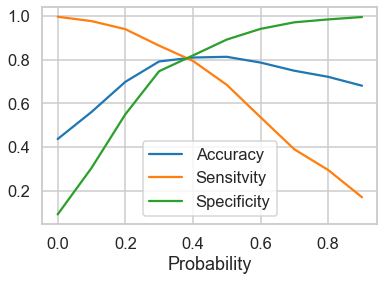

In [565]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()

In [566]:
#Hence from the diaghram we can conclude that 0.4 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.4 hence final cutoff we choose is 0.4

In [567]:
# Predicting the outcomes with probability cutoff as 0.4 

y_train_final['Predicted']=y_train_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_train_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.276141,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.280094,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.312207,3516,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.758909,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.219038,3934,1,1,1,0,0,0,0,0,0,0,0


In [568]:
#Precision and Recall:

#In order for the Precision and Recall we are using the confusion matrix for the final dataset

# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_final.Converted,y_train_final.Predicted)
confusion_pr

array([[3277,  725],
       [ 508, 1958]], dtype=int64)

In [569]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       

Precision 0.729780096906448
Recall 0.7939983779399837


In [570]:
#Hence we can conclude the following points from the Precison and Recall:
#Our precison percentage is currently 73% approximately and the business percentage is 79%
#This means we are having a very good model which explains the relevancy of 73% and true relevant results about 79%.

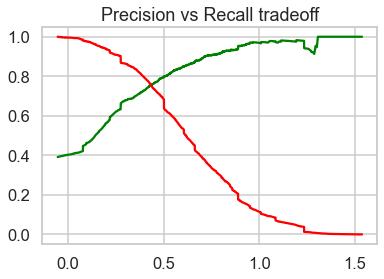

In [572]:
#Precision and Recall trade-off:
from sklearn.metrics import precision_recall_curve
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_final.Converted,y_train_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    
plt.plot(thresholds, r[:-1], "r-")    
plt.show()

#As we can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.5

In [573]:
#RFE Test - 2
# Running RFE with variables 15

rfe2= RFE(logreg, 15)
rfe2= rfe2.fit(X_train,y_train)
rfe2.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [574]:
# selecting columns only which are 'True' in rfem.support_

col2=X_train.columns[rfe2.support_]

X_train_rfe2=sm.add_constant(X_train[col2])

In [575]:
# creating 1st model after RFE

logis_rfe2=sm.GLM(y_train,X_train_rfe2,family=sm.families.Binomial())

reg_rfe2=logis_rfe2.fit()

reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.1
Date:                Sun, 16 Oct 2022   Deviance:                       5396.2
Time:                        21:38:03   Pearson chi2:                 7.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0729      0.068      1.071      0.284      -0.060       0.206
Do Not Email                                            -1.2466      0.195     -6.387      0.000      -1.629      -0.864
Total Time Spent on Website                              1.1002      0.039     27.997      0.000       1.023       1.177
Lead Origin_Lead Add Form                                3.7950      0.191     19.905      0.000       3.421       4.169
Lead Source_Olark Chat                                   1.1718      0.102     11.457      0.000       0.971       1.372
Lead Source_Welingak Website                             1.9692      0.744      2.647      0.008       0.511       3.427
Last Activity_Email Bounced                             -1.0898      0.347     -3.139      0.002      -1.770      -0.409
Last Activity_Olark Chat Conversation                   -1.0933      0.192     -5.692      0.000      -1.470      -0.717
What is your current occupation_Housewife               22.9736   1.37e+04      0.002      0.999   -2.68e+04    2.69e+04
What is your current occupation_Working Professional     2.7611      0.187     14.792      0.000       2.395       3.127
Last Notable Activity_Email Link Clicked                -1.9010      0.272     -6.982      0.000      -2.435      -1.367
Last Notable Activity_Email Opened                      -1.3147      0.087    -15.160      0.000      -1.485      -1.145
Last Notable Activity_Had a Phone Conversation           2.1462      1.099      1.952      0.051      -0.008       4.301
Last Notable Activity_Modified                          -1.8200      0.096    -19.049      0.000      -2.007      -1.633
Last Notable Activity_Olark Chat Conversation           -1.5720      0.373     -4.218      0.000      -2.302      -0.842
Last Notable Activity_Page Visited on Website           -1.5801      0.191     -8.254      0.000      -1.955      -1.205
========================================================================================================================
"""

In [577]:
# Calculating VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# First we are creating vif dataframe

vif=pd.DataFrame()

# then we are adding same features as the x_train dataset have

vif['Features']=X_train_rfe2[col2].columns  

# Next we are Calculating the VIFs

vif['VIF']=[variance_inflation_factor(X_train_rfe2[col2].values,i) for i in range(X_train_rfe2[col2].shape[1])]

# Then we are Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Next we Sort the vif values

vif=vif.sort_values(by='VIF',ascending=False)
vif 
# We can see that all features are having vif values less than 5, So we can concluse that there is no multicollinearity issue in the given dataset.

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.91
0,Do Not Email,1.80
5,Last Activity_Email Bounced,1.79
3,Lead Source_Olark Chat,1.66
12,Last Notable Activity_Modified,1.55
2,Lead Origin_Lead Add Form,1.41
13,Last Notable Activity_Olark Chat Conversation,1.30
4,Lead Source_Welingak Website,1.24
1,Total Time Spent on Website,1.20
8,What is your current occupation_Working Profes...,1.14


In [578]:
#Dropping those attributes with greater p values 
X_train_rfe22=X_train_rfe2.drop(['const','What is your current occupation_Housewife','Lead Source_Welingak Website','Last Activity_Email Bounced','Last Notable Activity_Had a Phone Conversation'],1)

In [579]:
#Traing the model again:
X_train_rfe22=sm.add_constant(X_train_rfe22)                              
logis_rfe22=sm.GLM(y_train,X_train_rfe22,families=sm.families.Binomial())  
reg_rfe22=logis_rfe22.fit()                                                 
reg_rfe22.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.13958
Method:                          IRLS   Log-Likelihood:                -2803.7
Date:                Sun, 16 Oct 2022   Deviance:                       901.16
Time:                        21:42:19   Pearson chi2:                     901.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5034      0.010     48.992      0.000       0.483       0.524
Do Not Email                                            -0.1770      0.018     -9.916      0.000      -0.212      -0.142
Total Time Spent on Website                              0.1875      0.005     36.118      0.000       0.177       0.198
Lead Origin_Lead Add Form                                0.5946      0.018     32.621      0.000       0.559       0.630
Lead Source_Olark Chat                                   0.1681      0.014     11.898      0.000       0.140       0.196
Last Activity_Olark Chat Conversation                   -0.1225      0.020     -6.123      0.000      -0.162      -0.083
What is your current occupation_Working Professional     0.3346      0.018     18.604      0.000       0.299       0.370
Last Notable Activity_Email Link Clicked                -0.3097      0.036     -8.676      0.000      -0.380      -0.240
Last Notable Activity_Email Opened                      -0.2256      0.013    -17.677      0.000      -0.251      -0.201
Last Notable Activity_Modified                          -0.3030      0.013    -23.613      0.000      -0.328      -0.278
Last Notable Activity_Olark Chat Conversation           -0.2871      0.040     -7.212      0.000      -0.365      -0.209
Last Notable Activity_Page Visited on Website           -0.2692      0.026    -10.237      0.000      -0.321      -0.218
========================================================================================================================
"""

In [581]:
# Checking VIF again just to be sure

X_train_rfe0=X_train_rfe22.drop('const',1)     
vif=pd.DataFrame()                             
vif['Features']=X_train_rfe0.columns           

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_rfe0.values,i) for i in range(X_train_rfe0.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   

#As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.

,Features,VIF
4,Last Activity_Olark Chat Conversation,1.89
3,Lead Source_Olark Chat,1.65
8,Last Notable Activity_Modified,1.51
9,Last Notable Activity_Olark Chat Conversation,1.30
1,Total Time Spent on Website,1.20
2,Lead Origin_Lead Add Form,1.16
5,What is your current occupation_Working Profes...,1.12
0,Do Not Email,1.11
7,Last Notable Activity_Email Opened,1.10
6,Last Notable Activity_Email Link Clicked,1.02


In [584]:
#Predicting in train model:

# Predicting the train dataset with our final model

y_train_pred1=reg_rfe22.predict(X_train_rfe22)

# Creating a new dataset and saving predicted values in it

y_train_pred_final2=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred1,'ID':y_train.index})

y_train_pred_final2.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.279980,1871
6795,0,0.278967,6795
3516,0,0.316356,3516
8105,0,0.759491,8105
3934,0,0.202556,3934


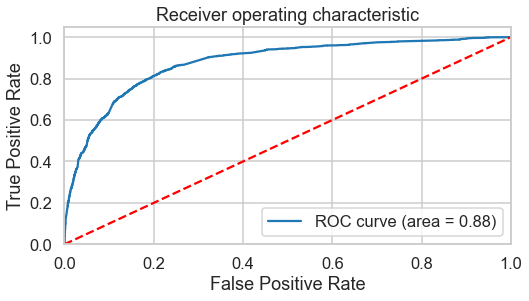

In [585]:
#ROC curve plotting:

lead_roc(y_train_pred_final2.Converted, y_train_pred_final2.Converted_probability)

In [586]:
#The following conclusion can be concluded from the above graph:
#The curve is closer to the left side of the border line than to the right side hence we can conclude that our model is having great accuracy.
#The area under the curve is 87% of the total area.

In [587]:
#Conclusion from RFE Test - 1 & Test - 2:
#For Test - 1, we saw that the auc score is 0.88 in ROC curve plot.
#For Test - 2, we saw that the auc score is 0.88 in ROC curve plot.
# Hence we can conclude that both Test-1 and Test-2 are stable

In [588]:
#Prediction the test dataset:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [590]:
# Predicting the test dataset with our final model

test_cols=X_train_2.columns[1:]              
X_test_final=X_test[test_cols]               
X_test_final=sm.add_constant(X_test_final)   
y_pred_test=reg2.predict(X_test_final)      

In [591]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   

,Converted,Converted_Probability,ID
4269,1,0.681570,4269
2376,1,0.886555,2376
7766,1,0.701682,7766
9199,0,0.078127,9199
4359,1,0.663291,4359


In [592]:
#Model Evaluation:

# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )   

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.681570,4269,1
2376,1,0.886555,2376,1
7766,1,0.701682,7766,1
9199,0,0.078127,9199,0
4359,1,0.663291,4359,1


In [593]:
# Checking the accuracy of the test dataset.

from sklearn import metrics   

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the score

Accuracy score in predicting test dataset : 0.8181818181818182


In [594]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      

Precision score in predicting test dataset: 0.7580786026200873
Recall score in predicting test dataset: 0.7926940639269406


In [596]:
#Lead Score assigning:

# Creating new columns for lead number and lead score

y_test_pred_final['Lead Number']=lead_df1.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.681570,4269,1,0,68
2376,1,0.886555,2376,1,0,89
7766,1,0.701682,7766,1,0,70
9199,0,0.078127,9199,0,0,8
4359,1,0.663291,4359,1,0,66
